# Customer Segmentation Analysis for PE-2

In [1]:



import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans


In [2]:
import missingno as mn
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap


In [3]:
df = pd.read_excel('Mall_Customers1.xlsx')

In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [8]:

plt.style.use('fivethirtyeight')

<Axes: >

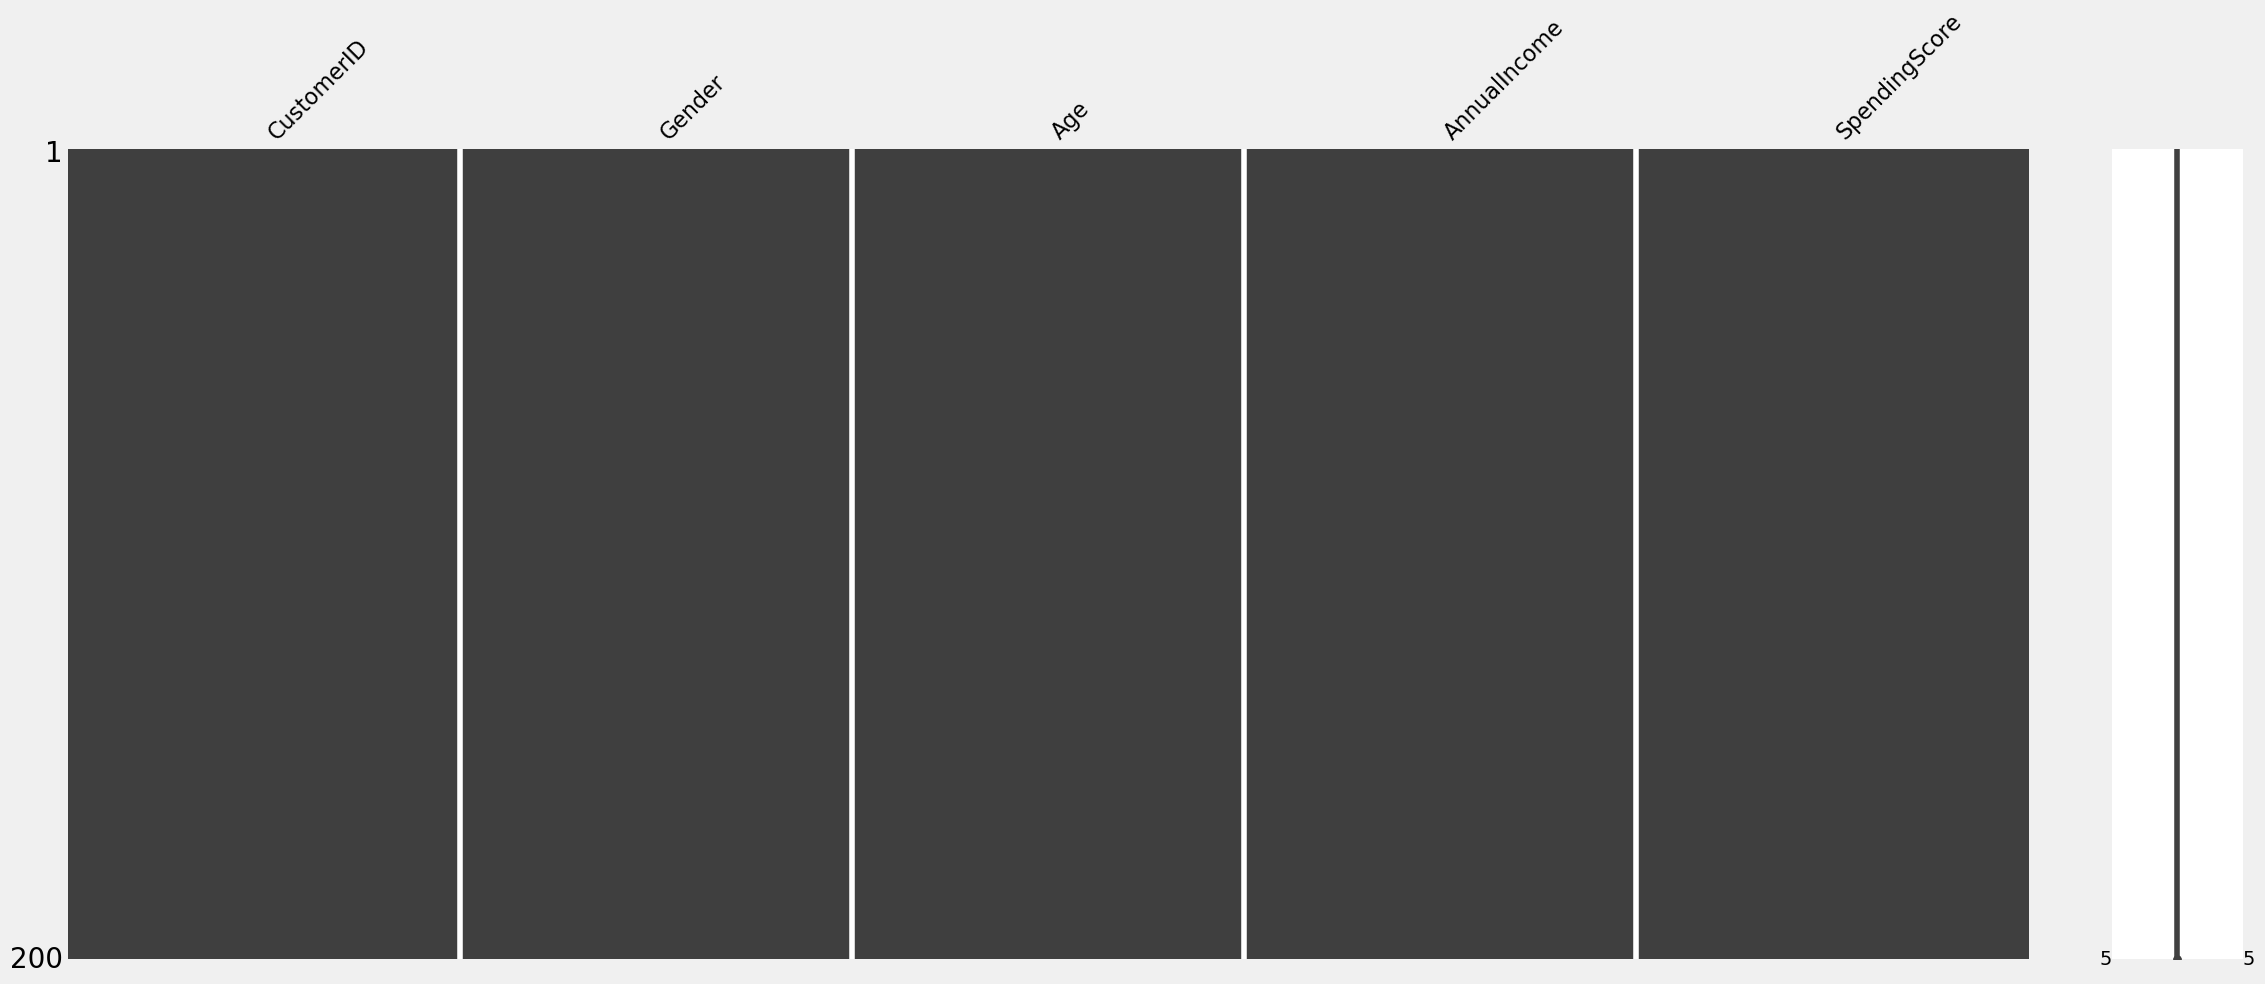

In [9]:
# Checking if any value is missing in data.

mn.matrix(df)

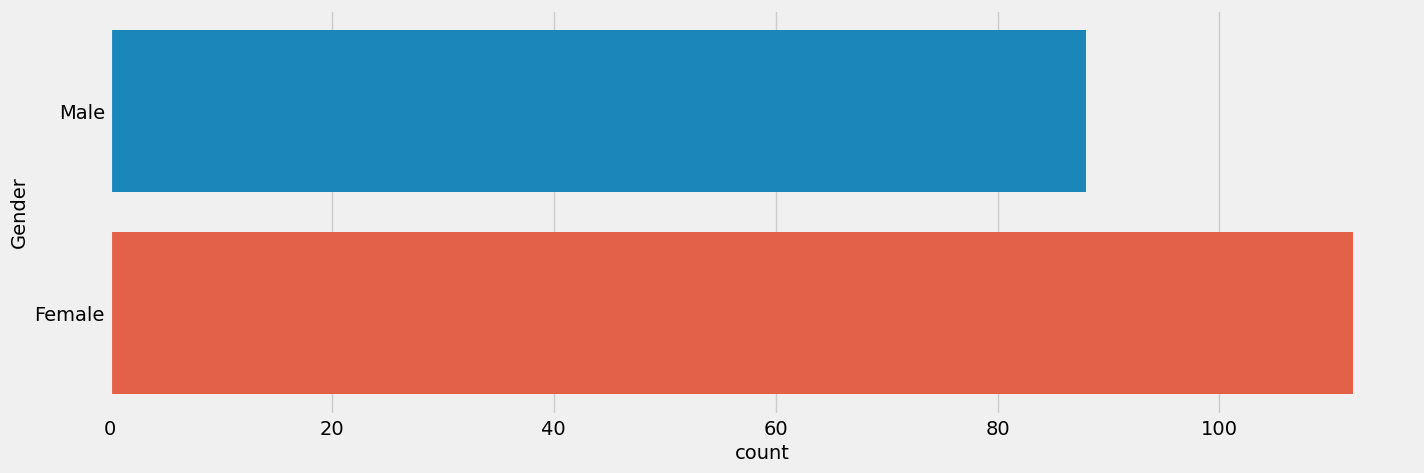

In [11]:
# Plotting Bar chart for Gender comaprison.

plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

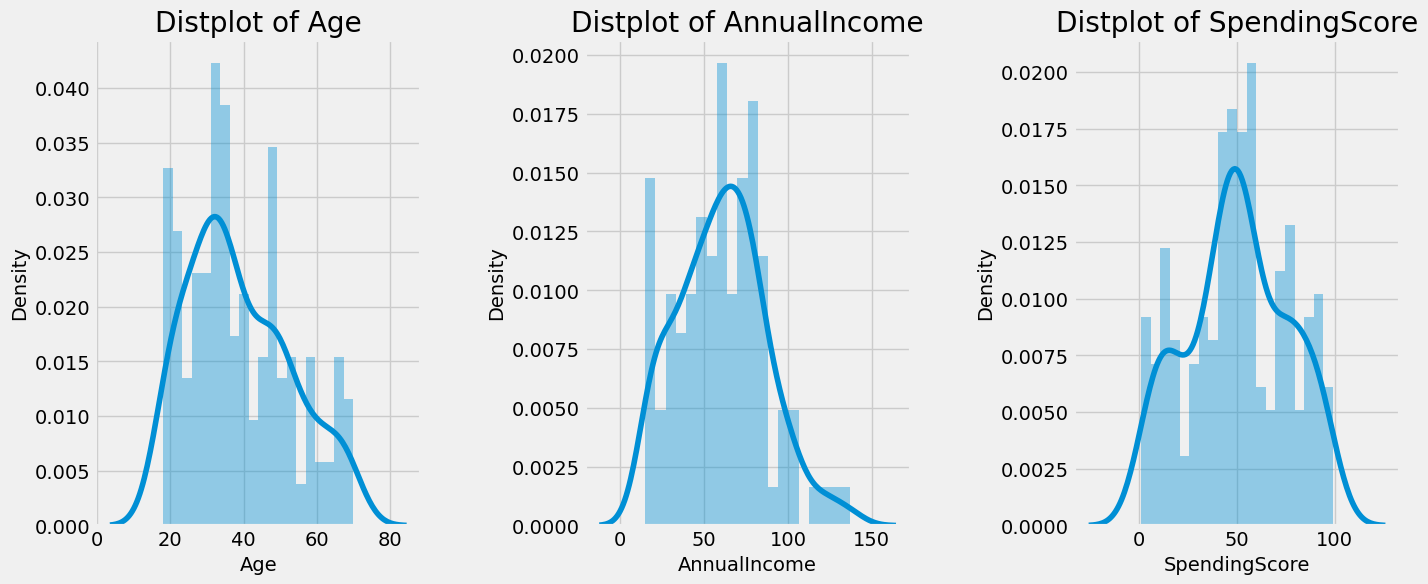

In [12]:
# Plotting the displot for Age,Anunal Income and Spennding Score.

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()
#This code is plotting a distplot for three variables in a dataset using seaborn and matplotlib 
# libraries in Python. The three variables being plotted are Age, AnnualIncome, and SpendingScore.

# The distplot function is used to create a histogram with a kernel density estimate (KDE) line on top
# It shows the distribution of values for each variable, which can be useful for understanding the
# shape of the data and identifying any patterns or trends.

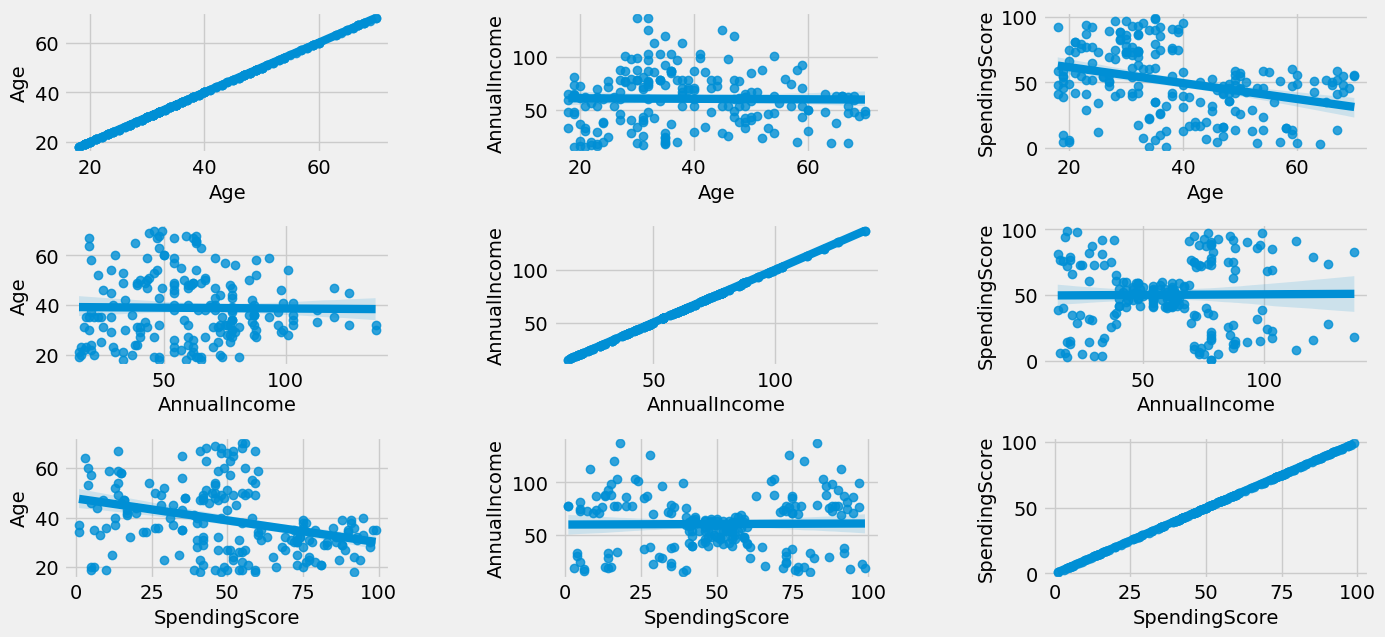

In [13]:
# Plotting Reg Chart for Age Anunal Imcome and Spending Score .

plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    for y in ['Age' , 'AnnualIncome' , 'SpendingScore']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()
#This code is creating a 3x3 grid of scatter plots using the regplot function from the seaborn Python
# library. Each plot shows the relationship between two variables, with the x-axis representing one
# variable and the y-axis representing the other variable.

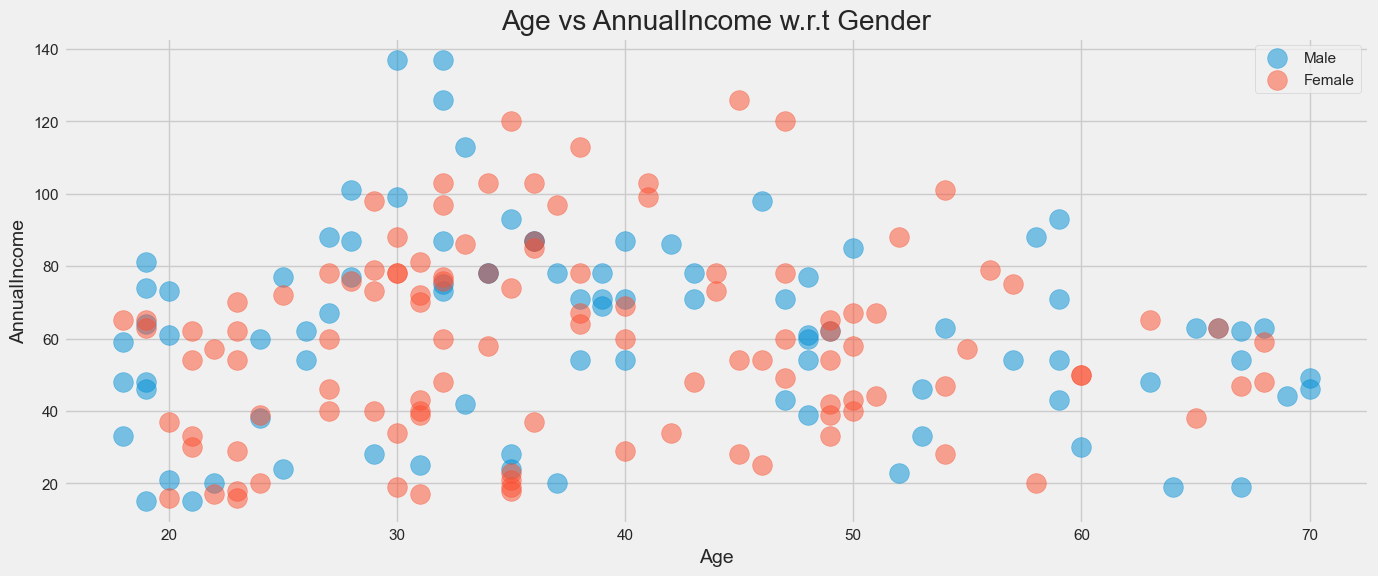

In [73]:

# Plotting Scatter Chart for Age Vs Anunal_Income W.R.T Gender.

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'AnnualIncome' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('AnnualIncome') 
plt.title('Age vs AnnualIncome w.r.t Gender')
plt.legend()
plt.show()
#This code is creating a scatter plot of the variables 'Age' and 'AnnualIncome' with respect to the categorical variable 
# 'Gender'. The scatter plot shows the relationship between age and annual income for males and females separately.

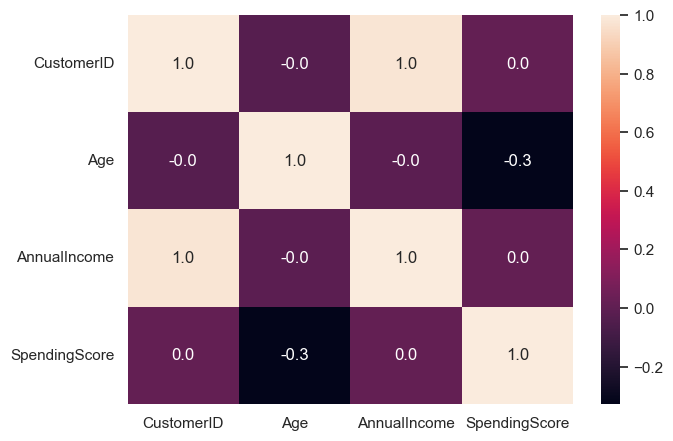

In [59]:
# Rescaling of Data is done here.
x= df.iloc[:,3:5]
sns.heatmap(df.corr(),annot=True,fmt='.1f')
#In a heatmap, the annot parameter is used to add numeric values to each cell of the heatmap. When annot is set to True, 
# it will display the numeric value on each cell. When annot is set to a list of the same shape as the data, it will display the 
# values in the list instead of the numeric value. The default value for annot is False, meaning no numeric values will be
# displayed on the heatmap.
plt.show()
#The heatmap shows a color-coded matrix of the pairwise correlation coefficients between all pairs of variables in the dataset. 
# This can be useful for identifying strong correlations between pairs of variables, which can be important for feature
# selection or variable transformation in machine learning models.

In [ ]:

# fmt is a string format code used for formatting the text in annotations in seaborn heatmaps. It specifies the format of the
# text, such as the number of decimal places, scientific notation, or percentage format.The fmt parameter is used in conjunction
# with the annot parameter, which is used to display the annotation values on the heatmap. The fmt parameter is set to '.1f' in
# the code, which means that the annotation values will be displayed with one decimal place.

In [15]:


print('Max  :',max(df[df['Gender']=='Male'].Age))
print('Min  :',min(df[df['Gender']=='Male'].Age))
print('Mean :',np.mean(df[df['Gender']=='Male'].Age))
print('Std  :',np.std(df[df['Gender']=='Male'].Age))


Max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472942


In [16]:
#Male SpendingScore 
print('Max  :',max(df[df['Gender']=='Male'].SpendingScore))
print('Min  :',min(df[df['Gender']=='Male'].SpendingScore))
print('Mean :',np.mean(df[df['Gender']=='Male'].SpendingScore))
print('Std  :',np.std(df[df['Gender']=='Male'].SpendingScore))




Max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [17]:
print('Max  :',max(df[df['Gender']=='Male'].AnnualIncome))
print('Min  :',min(df[df['Gender']=='Male'].AnnualIncome))
print('Mean :',np.mean(df[df['Gender']=='Male'].AnnualIncome))
print('Std  :',np.std(df[df['Gender']=='Male'].AnnualIncome))

Max  : 137
Min  : 15
Mean : 62.22727272727273
Std  : 26.486586344758496


In [18]:
#Female SpendingScore
print('Max  :',max(df[df['Gender']=='Female'].SpendingScore))
print('Min  :',min(df[df['Gender']=='Female'].SpendingScore))
print('Mean :',np.mean(df[df['Gender']=='Female'].SpendingScore))
print('Std  :',np.std(df[df['Gender']=='Female'].SpendingScore))

Max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.007052468801657


In [ ]:
# The first line df.Age.unique() retrieves all the unique values from the 'Age' column of the dataframe 'df'. It returns an array of all unique values in the 'Age' column.

# The second line print(len(df.Age.unique())) prints the total number of unique values in the 'Age' column.

# The third line df.Age.value_counts()[:10] counts the number of occurrences of each unique value in the 'Age' column and returns the top 10 most frequent values along with their respective counts, in descending order.


In [19]:

df.Age.unique()
print(len(df.Age.unique()))
df.Age.value_counts()[:10]

51


32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
Name: Age, dtype: int64

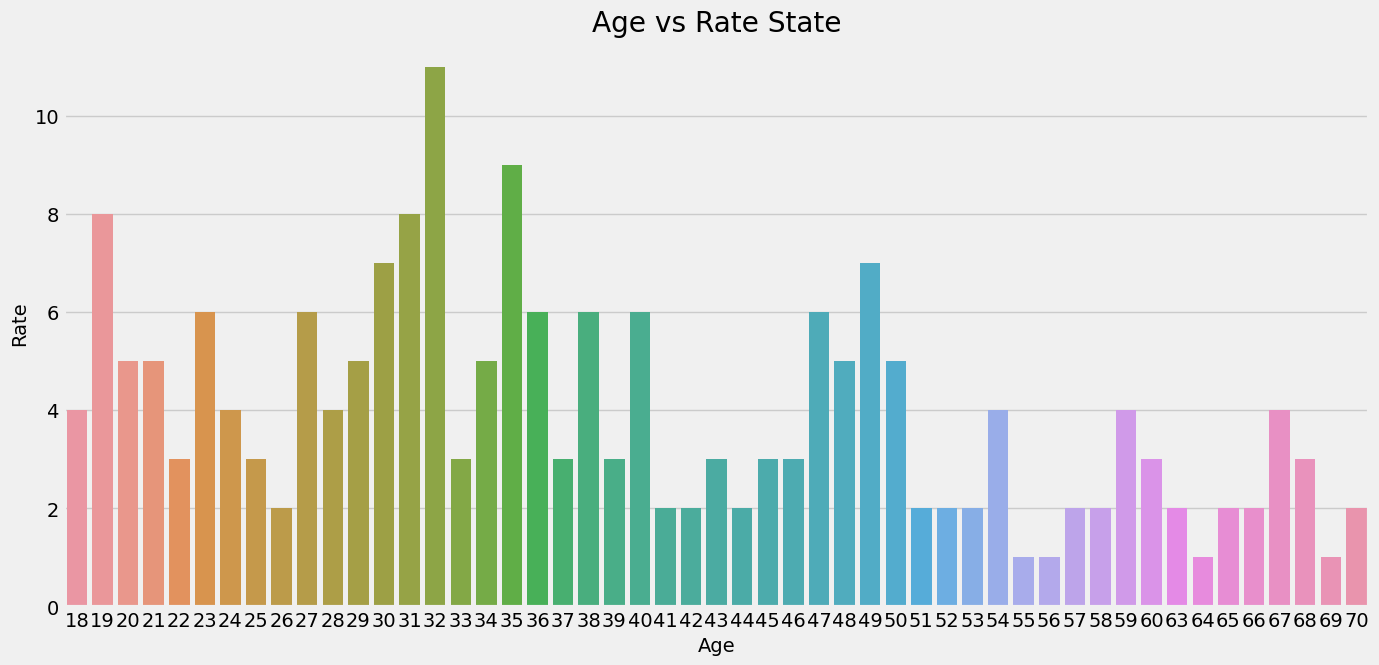

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.Age.value_counts().index,y=df.Age.value_counts().values)
#creates the bar plot using Seaborn's barplot function.
# The x argument specifies the unique age values in the dataset, and the y argument specifies the count of individuals with each
# age value.
plt.xlabel('Age')
plt.ylabel('Rate')
plt.title('Age vs Rate State')
plt.show()

In [75]:
age_income=[]
age_unique=df.Age.unique()
for age in age_unique:
    age_income.append(sum(df[df['Age']==age].AnnualIncome))
#     append is a method used in Python to add elements to a list. It takes an argument, which can be a single element or another list, and adds it to the end of the list on which the method is called. For example, my_list.append('new_element') will add the string 'new_element' to the end of the list my_list.

In [ ]:

# # A point plot is a type of plot that displays point estimates and confidence intervals using markers and lines.
# In a point plot, each value is represented by a point, and the point positions on the x-axis are adjusted according to the 
# categorical variable.It is useful for comparing multiple categories and showing how they differ on some quantitative variable.

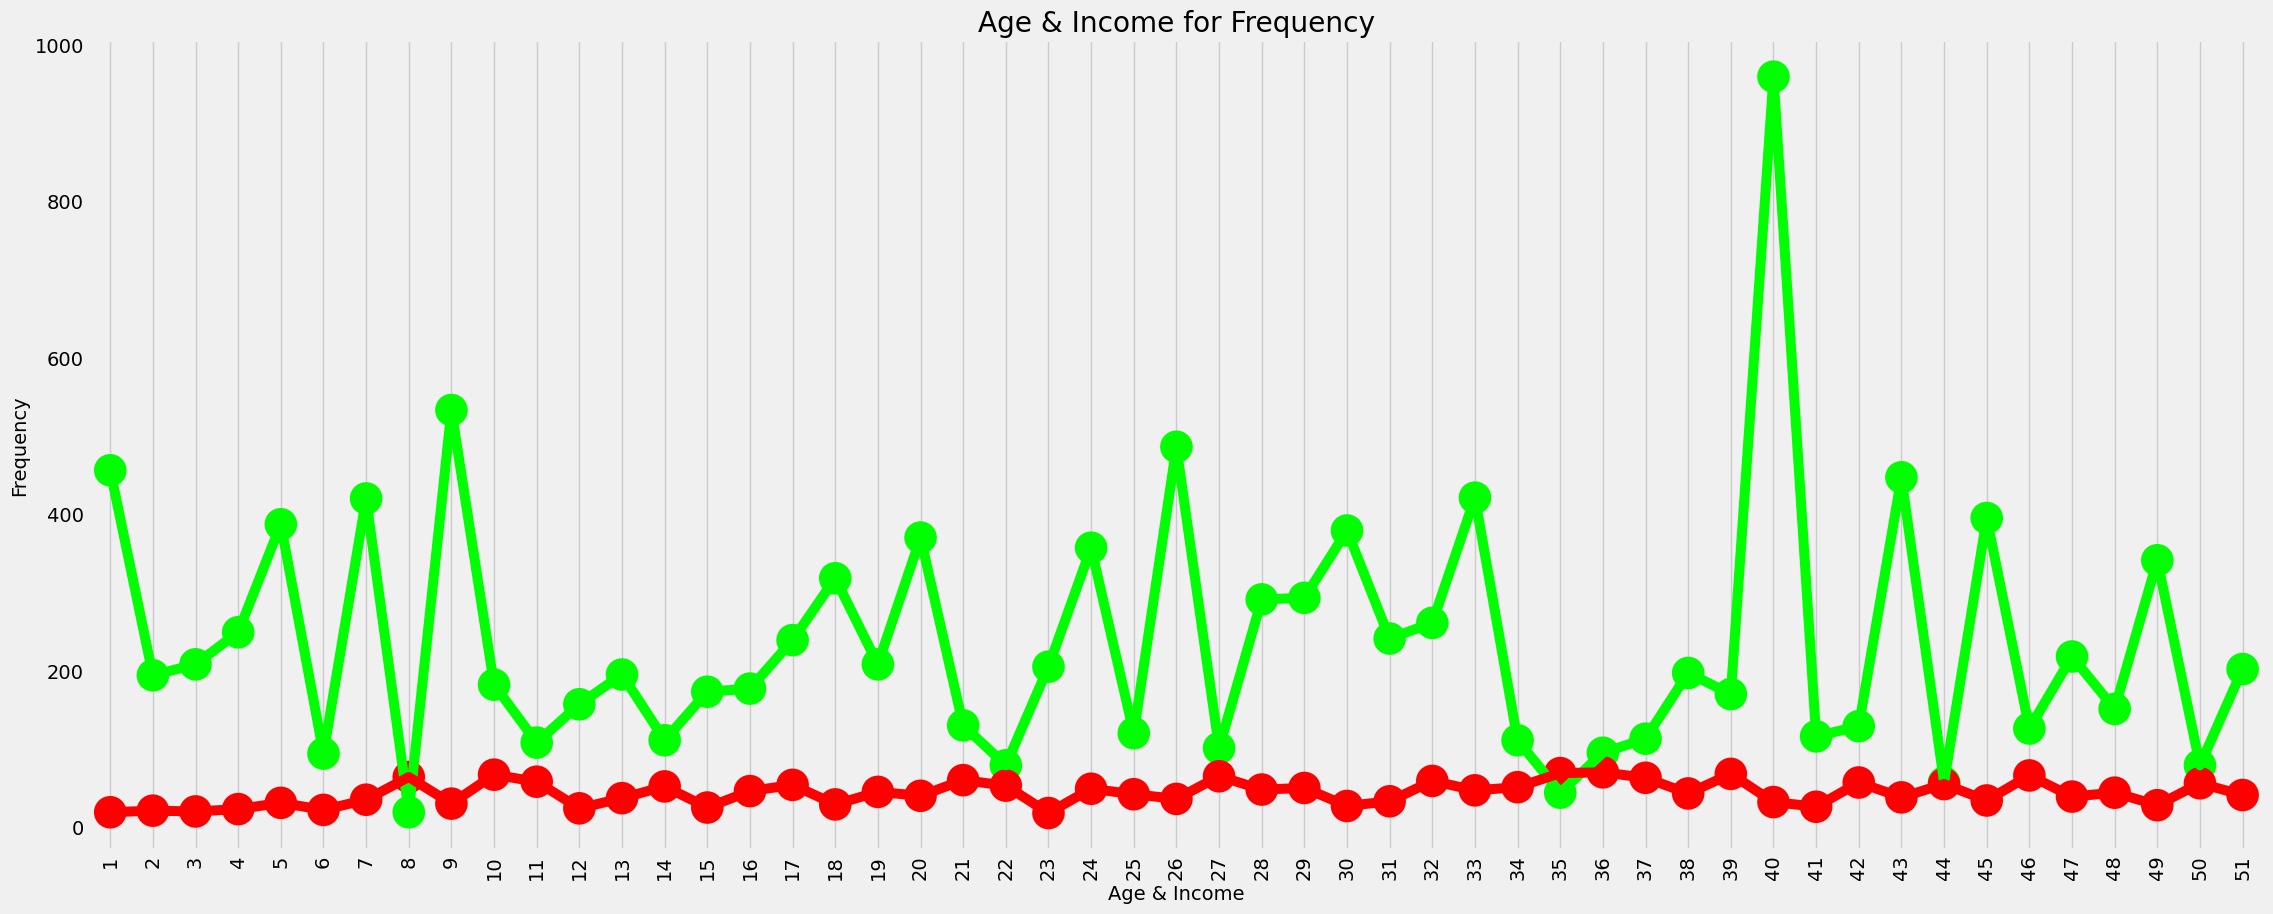

In [22]:
#Age show point plot
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,52),y=age_income,color='lime',label='Income')#there 51 unique age in dataset 
sns.pointplot(x=np.arange(1,52),y=age_unique,color='red',label='Age')
plt.xlabel('Age & Income')
plt.ylabel('Frequency')
plt.title('Age & Income for Frequency')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
# 1.The first plot (in lime color) shows the relationship between the index values (x) and the age_income list (y).
# The x values range from 1 to 51 (there are 51 unique ages in the dataset), and the y values correspond to the total annual 
# income for each age in the dataset.

# 2.The second plot (in red color) shows the relationship between the index values (x) and the age_unique list (y).The x values
# and y values are the same as in the first plot. Here, the y values correspond to the count of individuals with each age in
# the dataset.

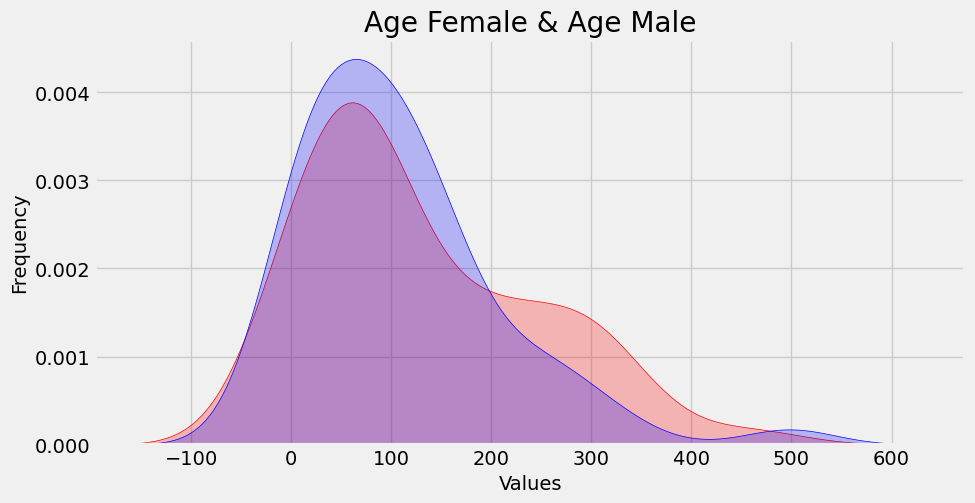

In [23]:
age_female_income=[]
age_male_income=[]
for age in age_unique:
    age_male_income.append(sum(df[np.logical_and(df['Gender']=='Male',df['Age']==age)].AnnualIncome))
    age_female_income.append(sum(df[np.logical_and(df['Gender']=='Female',df['Age']==age)].AnnualIncome))
    
plt.figure(figsize=(10,5))
sns.kdeplot(age_female_income,shade=True,color='r')
sns.kdeplot(age_male_income,shade=True,color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Female & Age Male')
plt.show()
# This code calculates and plots the kernel density estimation (KDE) plot for the distribution of annual income for both male
# and female customers, grouped by age.

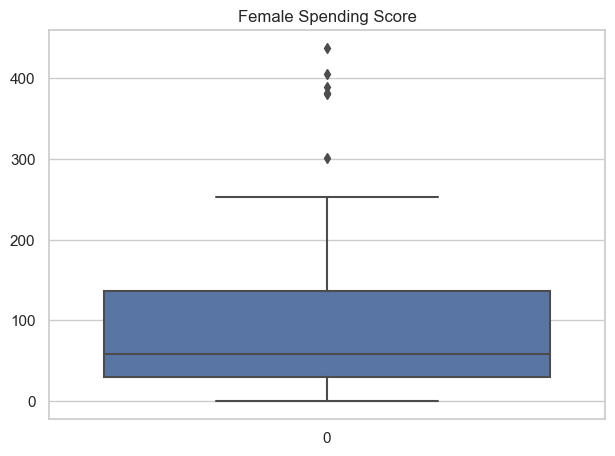

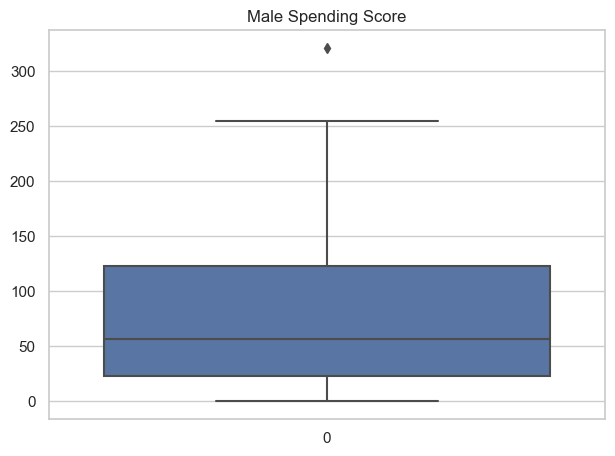

In [24]:
age_female_spendingScore=[]
age_male_spendingScore=[]
for age in age_unique:
    age_male_spendingScore.append(sum(df[np.logical_and(df['Gender']=='Male',df['Age']==age)].SpendingScore))
    age_female_spendingScore.append(sum(df[np.logical_and(df['Gender']=='Female',df['Age']==age)].SpendingScore))
sns.set(style='whitegrid')
sns.boxplot(age_female_spendingScore)
plt.title('Female Spending Score')
plt.show()
sns.set(style='whitegrid')
sns.boxplot(age_male_spendingScore)
plt.title('Male Spending Score')
plt.show()

# In this code, the spending score of females and males is calculated for each unique age present in the dataset. Then, the 
# seaborn library is used to create boxplots for both genders, separately.

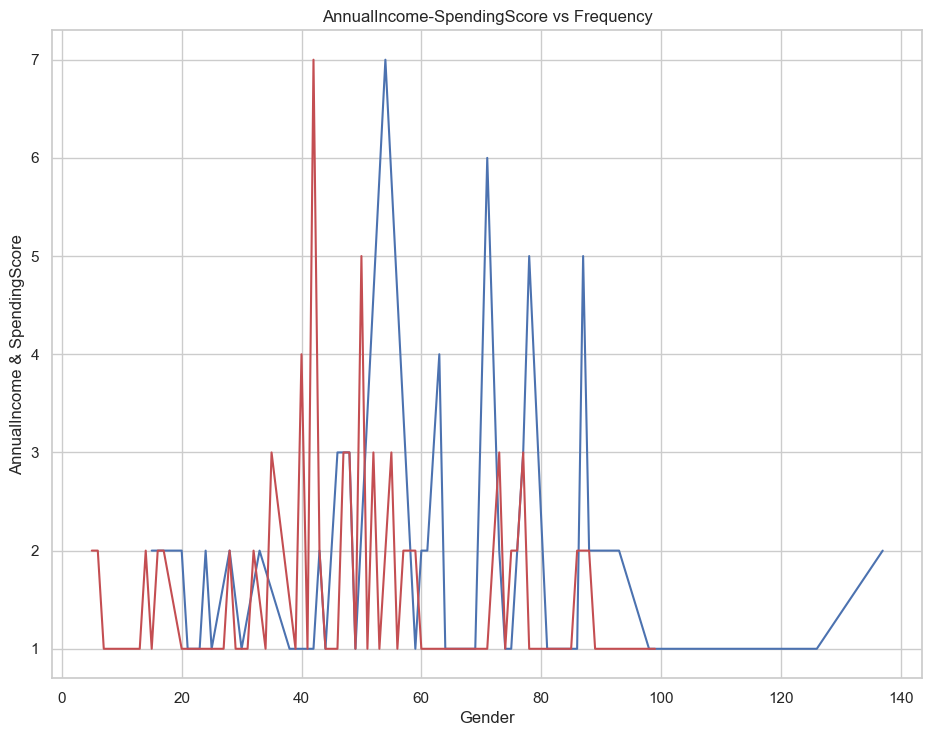

In [25]:
plt.figure(figsize=(10,8))
df[df['Gender']=='Male']['AnnualIncome'].value_counts().sort_index().plot.line(color='b')
df[df['Gender']=='Female']['SpendingScore'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Gender')
plt.ylabel('AnnualIncome & SpendingScore')
plt.title('AnnualIncome-SpendingScore vs Frequency')
plt.show()
# The code will create a line plot with two lines, one for the frequency distribution of AnnualIncome for males (in blue) and 
# another for the frequency distribution of SpendingScore for females (in red). The x-axis will represent gender and the y-axis
# will represent the frequency of occurrence.

In [26]:
df['GenderValue']=[ 0 if gender=='Female' else 1 for gender in df.Gender]
df.dtypes
df['AgesBetween']= pd.cut(df['Age'],5)
df.AgesBetween.unique()
age_between=[]
for age in df.Age:
    if((age>=17.948 and age<28.4)):
        age_between.append(0)
    elif((age>=28.4 and age<38.8)):
        age_between.append(1)
    elif((age>=38.8 and age<49.2)):
        age_between.append(2)
    elif((age>=49.2 and age<59.6)):
        age_between.append(3)
    elif((age>=59.6 and age<=70.0)):
        age_between.append(4)
len(age_between)
age_between[:10]


# In the code, a new column "GenderValue" is added to the DataFrame which contains binary values (0 or 1) based on whether the
# gender is Female or Male. Then, the "Age" column is divided into 5 age groups using the "pd.cut()" function and a new column
# "AgesBetween" is added to the DataFrame which contains the age groups.

# After that, a list "age_between" is created which contains the index of age group for each customer based on their age. The
# if-else statements check the age of each customer and assign the index of the age group (0 to 4) accordingly. The first 10
# elements of the list "age_between" are printed using slicing.

[0, 0, 0, 0, 1, 0, 1, 0, 4, 1]

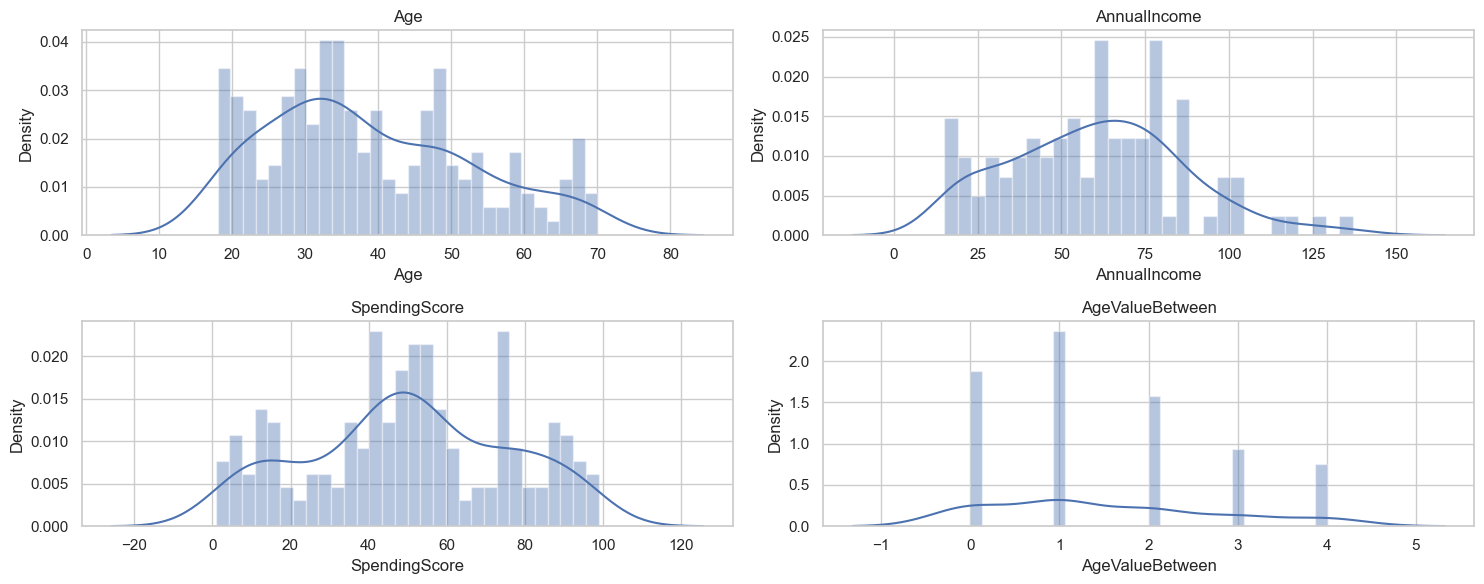

In [27]:
age_between=pd.DataFrame(data=age_between,index=range(0,200),columns=['AgeValueBetween'])
df.sample(10)
df=pd.concat([df,age_between],axis=1)
plt.figure(1 , figsize = (15 , 6))
for i,col in enumerate(['Age','AnnualIncome','SpendingScore','AgeValueBetween']):
    i=i+1
    plt.subplot(2 , 2,i)
    plt.title(col)
    sns.distplot(df[col] , bins = 30)
    plt.tight_layout()
plt.show()



# This code generates four histograms using the distplot function from the seaborn library.The histograms show the distribution 
# of the following variables from the DataFrame df:
# Age
# AnnualIncome
# SpendingScore
# AgeValueBetween
# The subplot function is used to create four subplots within a single figure.The tight_layout function is used to optimize the 
# spacing between the subplots.

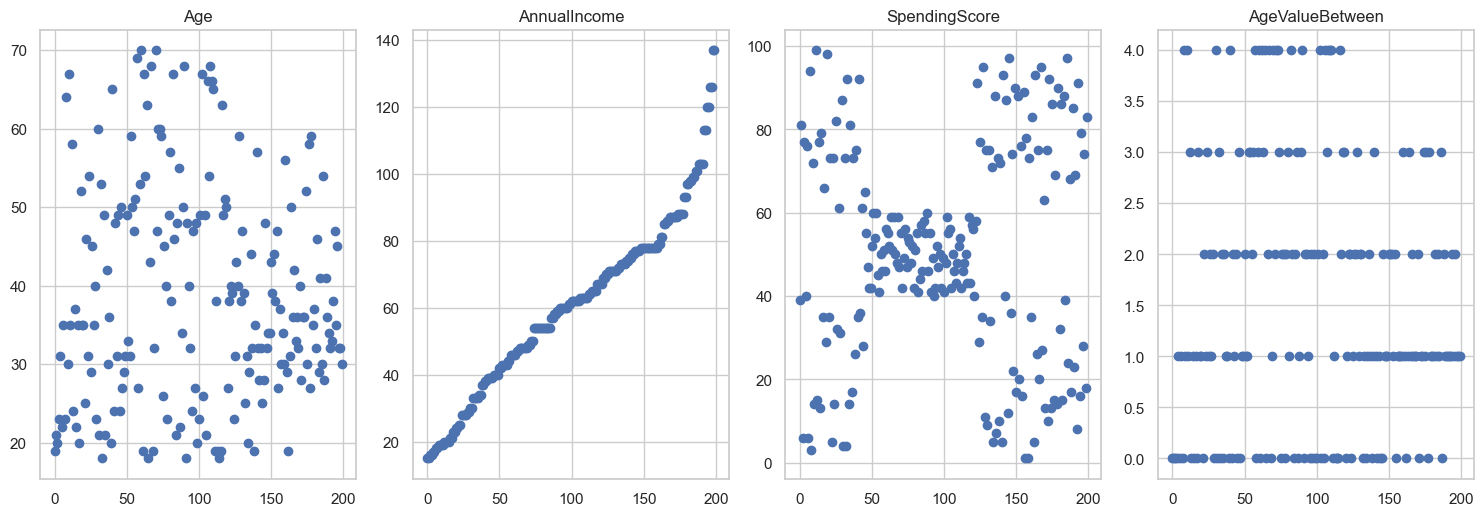

In [28]:
for i,col in enumerate(['Age', 'AnnualIncome', 'SpendingScore','AgeValueBetween']):
    plt.subplot(2,4,i+1)
    plt.scatter([i for i in range(200)],df[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(15,10)
    plt.tight_layout()
plt.show()
# This code is creating a scatter plot for each of the four columns 'Age', 'AnnualIncome', 'SpendingScore', and 
# 'AgeValueBetween'.

# enumerate is a built-in function in Python that returns an iterator object, which generates an index along with the item at 
# that index from a given iterable object. The enumerate() function takes two parameters:
# The iterable object that you want to loop over and get the index and value of each item in it.
# The starting index from which you want to start the numbering of the index (by default it is 0)
####The plt.scatter() function is used to create the scatter plot for each column. The x-axis is set to be the index values
# (0 to 199), and the y-axis is set to be the values of the current column as a list.


<Figure size 640x480 with 0 Axes>

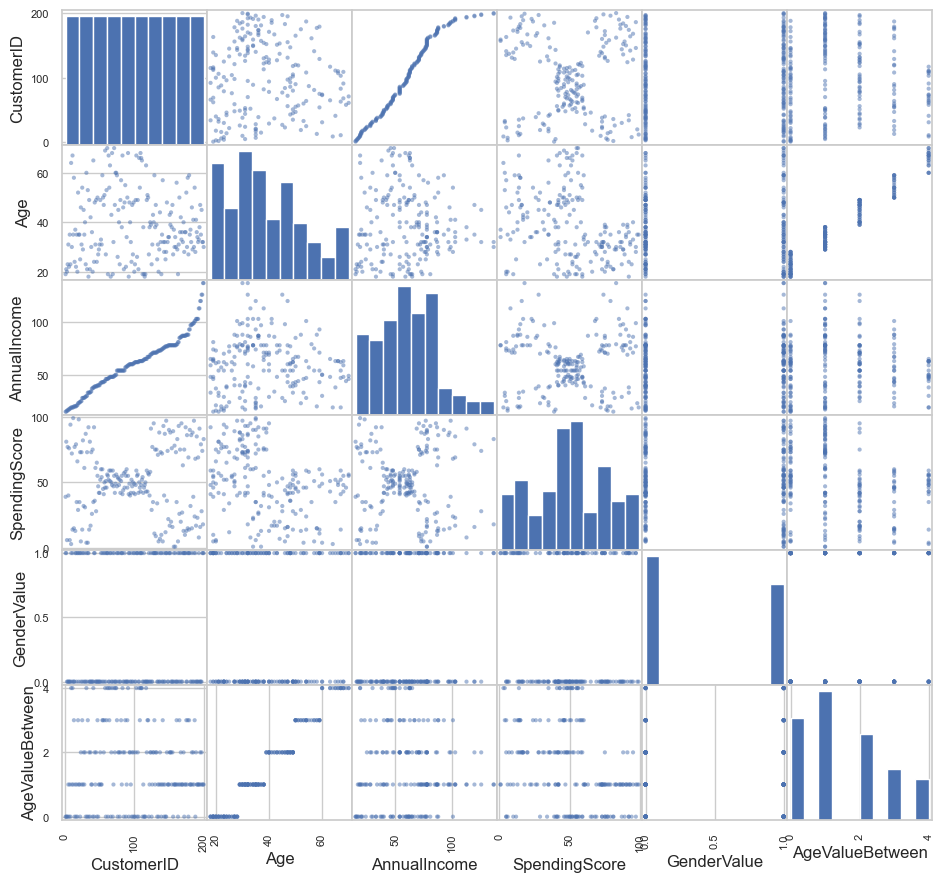

<Figure size 640x480 with 0 Axes>

In [29]:
pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.figure()
# The pd.plotting.scatter_matrix() function creates a scatterplot matrix of all numerical columns in a pandas DataFrame. 
# Each cell in the matrix is a scatterplot of one numerical column against another. The diagonal cells show a histogram of the
# corresponding column.
# The figsize parameter is used to set the size of the figure.
# The plt.figure() function creates a new empty figure, which is necessary to avoid displaying the previous figure again when 
# executing the next cell of code.

In [30]:
df.drop(['Gender','AgesBetween'],axis=1,inplace=True)
df.drop(['GenderValue','AgeValueBetween'],axis=1,inplace=True)

df.head()
# These lines of code are dropping certain columns from the dataframe 'df' using the drop() function with the axis parameter
# set to 1, indicating that the columns are to be dropped.
# The first line is dropping the columns 'Gender' and 'AgesBetween'. The second line is dropping the columns 'GenderValue' and
# 'AgeValueBetween'.
# The resulting dataframe 'df' will no longer contain these columns.

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [31]:

log_data=np.log(df)
good_data=log_data.drop([128,65,66,75,154])
good_data[:10]

# In this code, the natural logarithm of the original dataframe 'df' is calculated using the NumPy log() function and stored in 
# the 'log_data' variable.
# Five data points are dropped from 'log_data' and the resulting dataframe is stored in 'good_data'. The indices of the data 
# points that are dropped are [128, 65, 66, 75, 154]. The reason for dropping these data points is not clear from the code
# snippet alone.
# Finally, the first 10 rows of 'good_data' are printed using indexing.

,CustomerID,Age,AnnualIncome,SpendingScore
0,0.000000,2.944439,2.708050,3.663562
1,0.693147,3.044522,2.708050,4.394449
2,1.098612,2.995732,2.772589,1.791759
3,1.386294,3.135494,2.772589,4.343805
4,1.609438,3.433987,2.833213,3.688879
5,1.791759,3.091042,2.833213,4.330733
6,1.945910,3.555348,2.890372,1.791759
7,2.079442,3.135494,2.890372,4.543295
8,2.197225,4.158883,2.944439,1.098612
9,2.302585,3.401197,2.944439,4.276666


In [32]:
from sklearn.decomposition import PCA
pca=PCA().fit(good_data) #fits the PCA model to the preprocessed data good_data.
print(pca.explained_variance_ratio_)#gives the total % of variance .
print()
print(good_data.columns.values.tolist()) #returns a list of the column names in good_data.
print(pca.components_)#returns the principal components themselves as vectors
# Here, we are performing Principal Component Analysis (PCA) on the preprocessed data good_data using scikit-learn's PCA()
# function. ###used to reduce the dimensionality of a dataset while preserving as much of the variance in the data as possible.

[0.58402105 0.34756297 0.06146719 0.00694879]

['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']
[[-0.88492887 -0.04318647 -0.460206   -0.056976  ]
 [ 0.04281855  0.11355813  0.02984258 -0.99215954]
 [ 0.01298001 -0.99044883  0.08164755 -0.11034632]
 [-0.46357199  0.06519658  0.883546    0.01403143]]


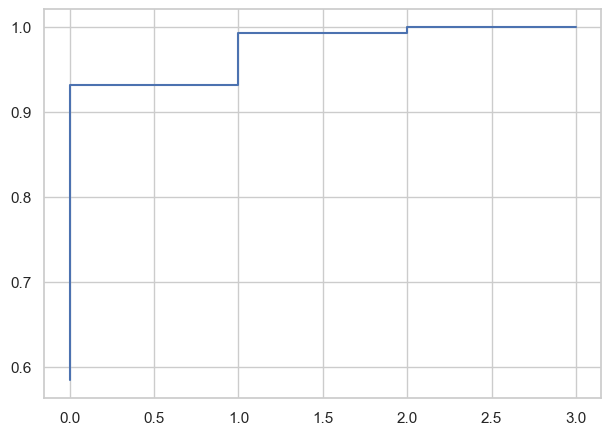

In [33]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()
# This code plots a step function of the cumulative sum of explained variance ratios for the principal components obtained using PCA.

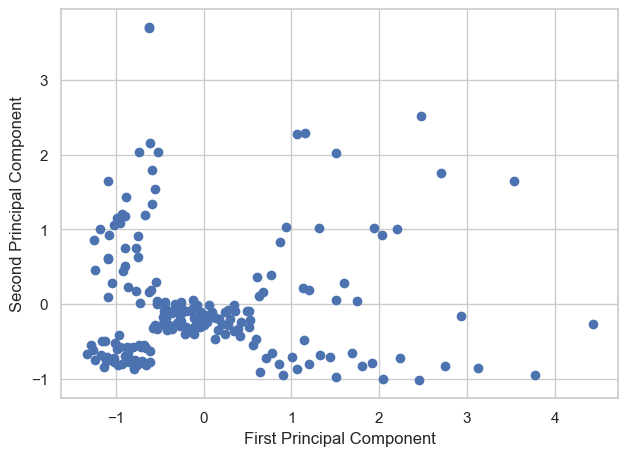

In [34]:
#redusing the dimensality of the dataset 
pca=PCA(n_components=2)
pca.fit(good_data)
reduced_data=pca.transform(good_data)
inverse_data=pca.inverse_transform(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [35]:
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])
reduced_data[:10]

cmap=LinearSegmentedColormap.from_list('BlRd',['blue','red','cyan'])

silhouette_scores=[]

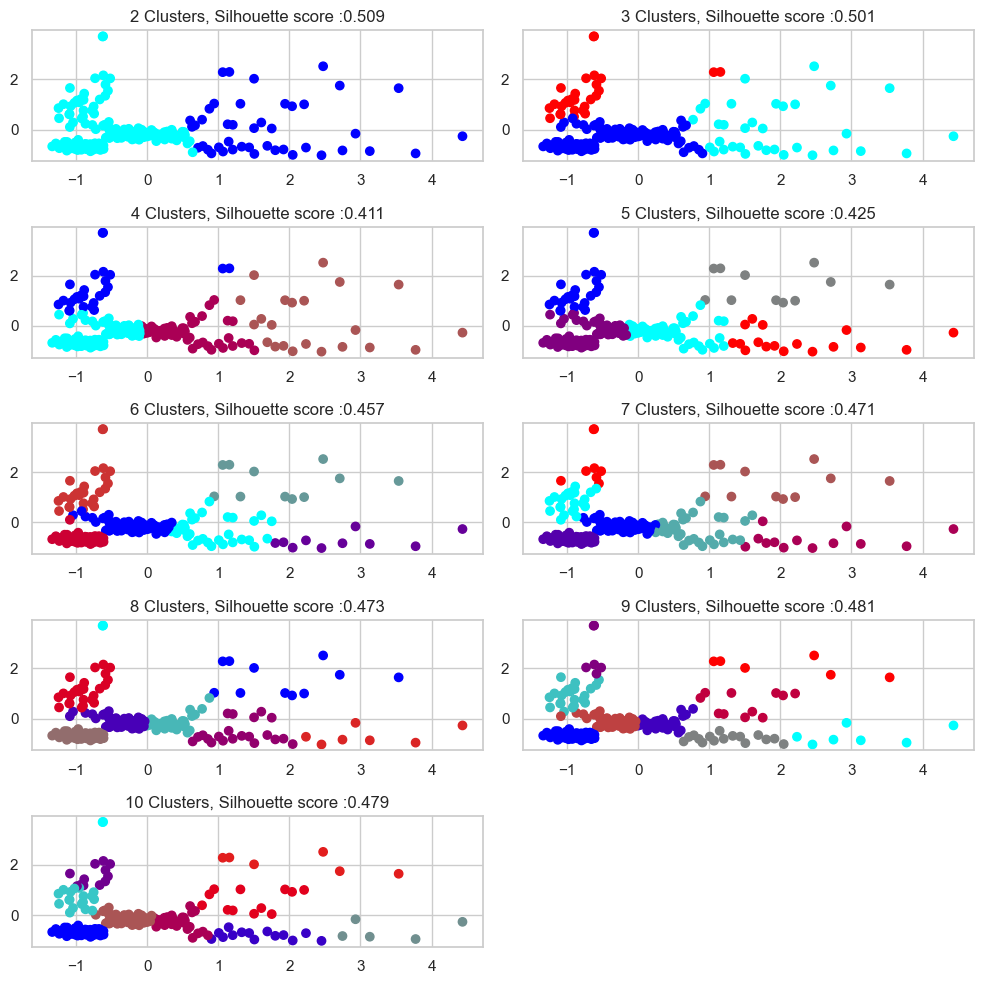

In [36]:
for i in range(2,11):
    cl=KMeans(n_clusters=i,random_state=0)
    result=cl.fit_predict(reduced_data)
    silhouette=silhouette_score(reduced_data,result)
    silhouette_scores.append(silhouette)
    plt.subplot(5,2,i-1)
    plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
    plt.title(str(i)+' Clusters, Silhouette score :'+ str(silhouette)[:5])
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()
# This code is performing KMeans clustering on the 2-dimensional reduced data obtained from PCA. It loops through values of k 
# (number of clusters) from 2 to 10 and for each value of k:
# Silhouette score is commonly used to evaluate the quality of clustering results.

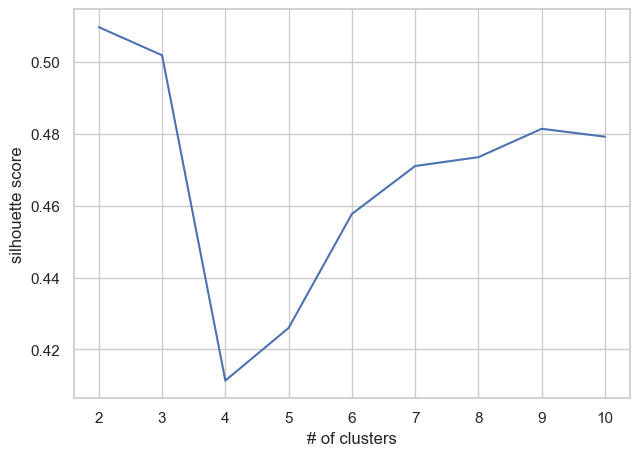

In [37]:
plt.plot([i for i in range(2,11)],silhouette_scores)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()

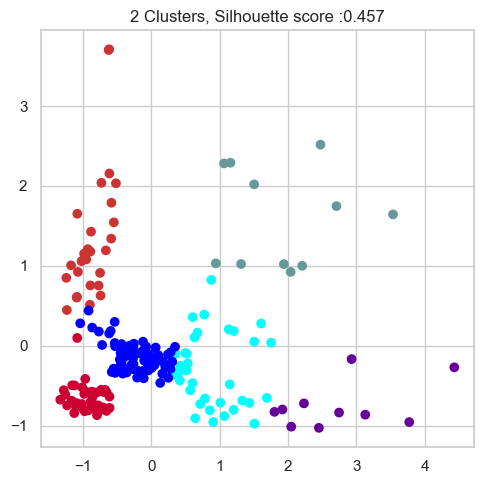

In [38]:
cl=KMeans(n_clusters=6,random_state=0)
result=cl.fit_predict(reduced_data)
silhouette=silhouette_score(reduced_data,result)
plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
plt.title(str(2)+' Clusters, Silhouette score :'+str(silhouette)[:5])
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

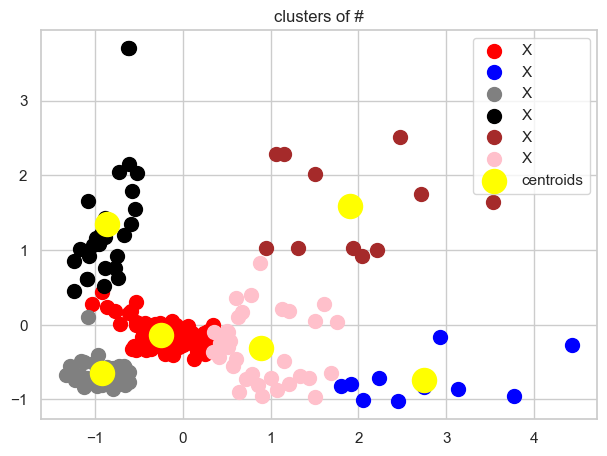

In [39]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300,random_state=0)
y_kmeans=kmeans.fit_predict(reduced_data)

reduced_data_X=reduced_data.to_numpy()

plt.scatter(reduced_data_X[y_kmeans==0,0],reduced_data_X[y_kmeans==0,1],s=100,c='red',label='X')
plt.scatter(reduced_data_X[y_kmeans==1,0],reduced_data_X[y_kmeans==1,1],s=100,c='blue',label='X')
plt.scatter(reduced_data_X[y_kmeans==2,0],reduced_data_X[y_kmeans==2,1],s=100,c='gray',label='X')
plt.scatter(reduced_data_X[y_kmeans==3,0],reduced_data_X[y_kmeans==3,1],s=100,c='black',label='X')
plt.scatter(reduced_data_X[y_kmeans==4,0],reduced_data_X[y_kmeans==4,1],s=100,c='brown',label='X')
plt.scatter(reduced_data_X[y_kmeans==5,0],reduced_data_X[y_kmeans==5,1],s=100,c='pink',label='X')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('clusters of #')
plt.legend()
plt.show()

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

methods=['ward','single','complete','average','weighted','centroid','median']

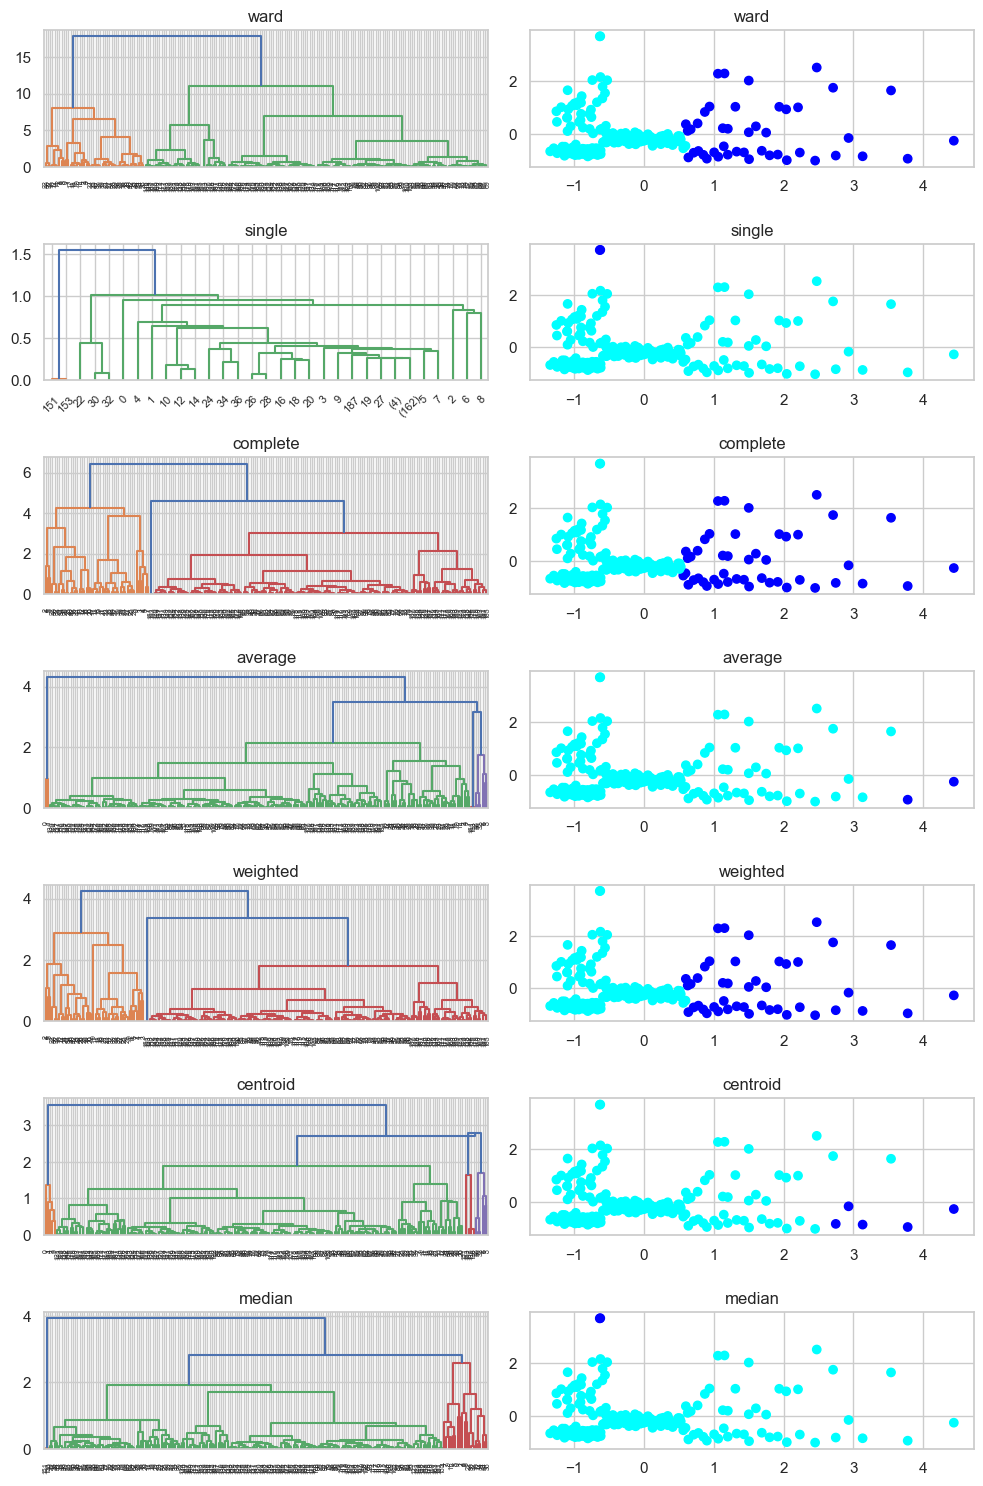

In [41]:
plot_id=0
for method in methods:
    cl=linkage(reduced_data,method=method)
    
    for sw in ['dendrogram','clusters']:
        if sw=='dendrogram':
            plot_id+=1
            plt.subplot(7,2,plot_id)
            plt.title(method)
            fig,ax=plt.gcf(),plt.gca()
            dn=dendrogram(cl,truncate_mode='level',p=15)
            plt.tight_layout()
            fig.set_size_inches(10,15)
        else:
            plot_id+=1
            labels=fcluster(cl,2,criterion='maxclust')
            plt.subplot(7,2,plot_id)
            plt.title(method)
            plt.scatter(reduced_data.Dim1.values.tolist(),
                       reduced_data.Dim2.values.tolist(),
                       cmap=cmap,
                       c=labels)
plt.show()     

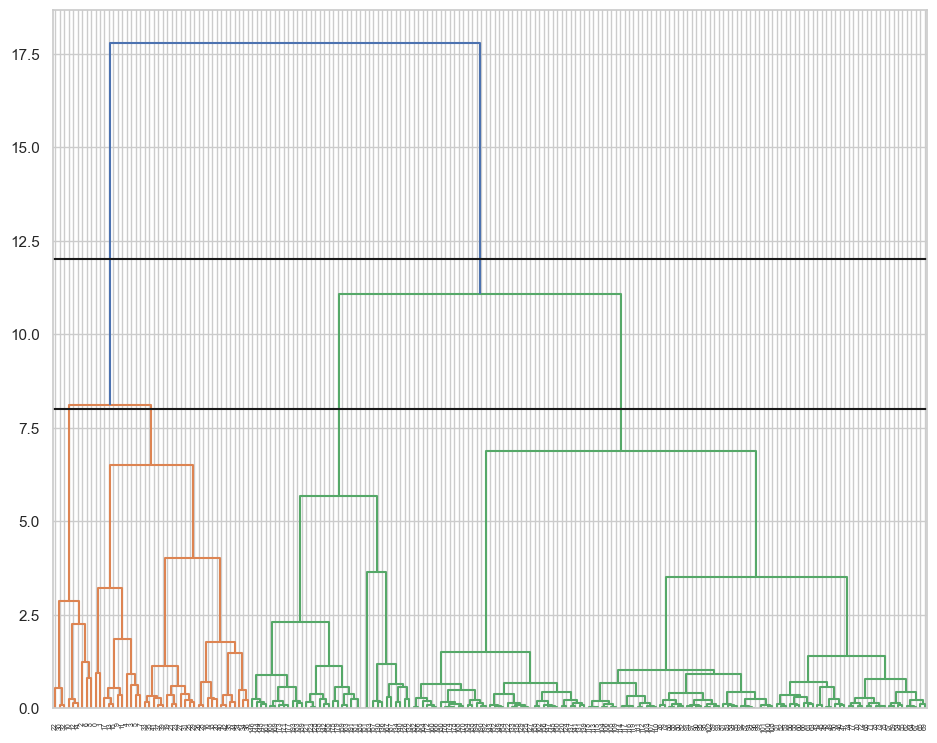

In [42]:
cl=linkage(reduced_data,method='ward')
fig,ax=plt.gcf(),plt.gca()
dn=dendrogram(cl,truncate_mode='level',p=15)
plt.tight_layout()
fig.set_size_inches(10,8)
plt.axhline(y=8,c='k')
plt.axhline(y=12,c='k')
plt.show()

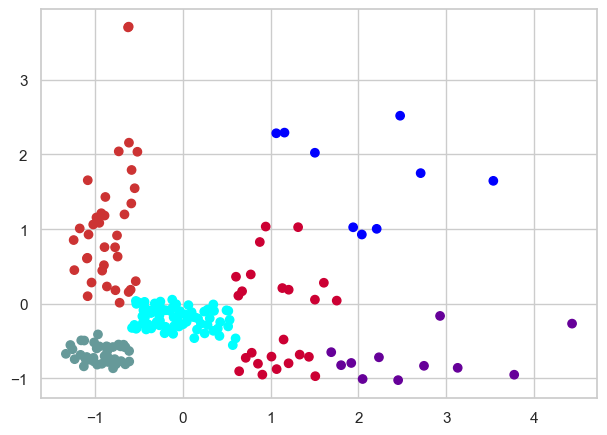

In [43]:
cl=linkage(reduced_data,method='ward')
labels=fcluster(cl,6,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()

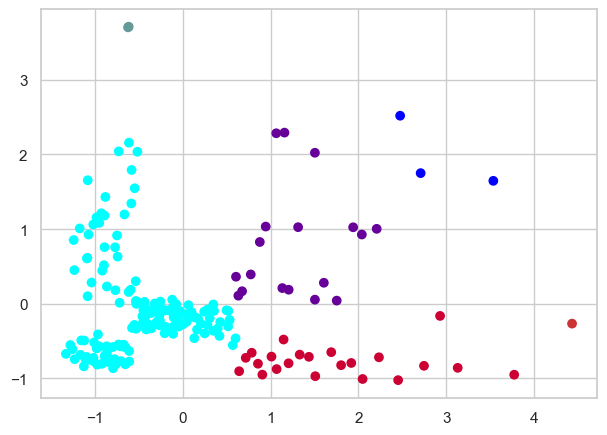

In [44]:
cl=linkage(reduced_data,method='weighted')
labels=fcluster(cl,6,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()

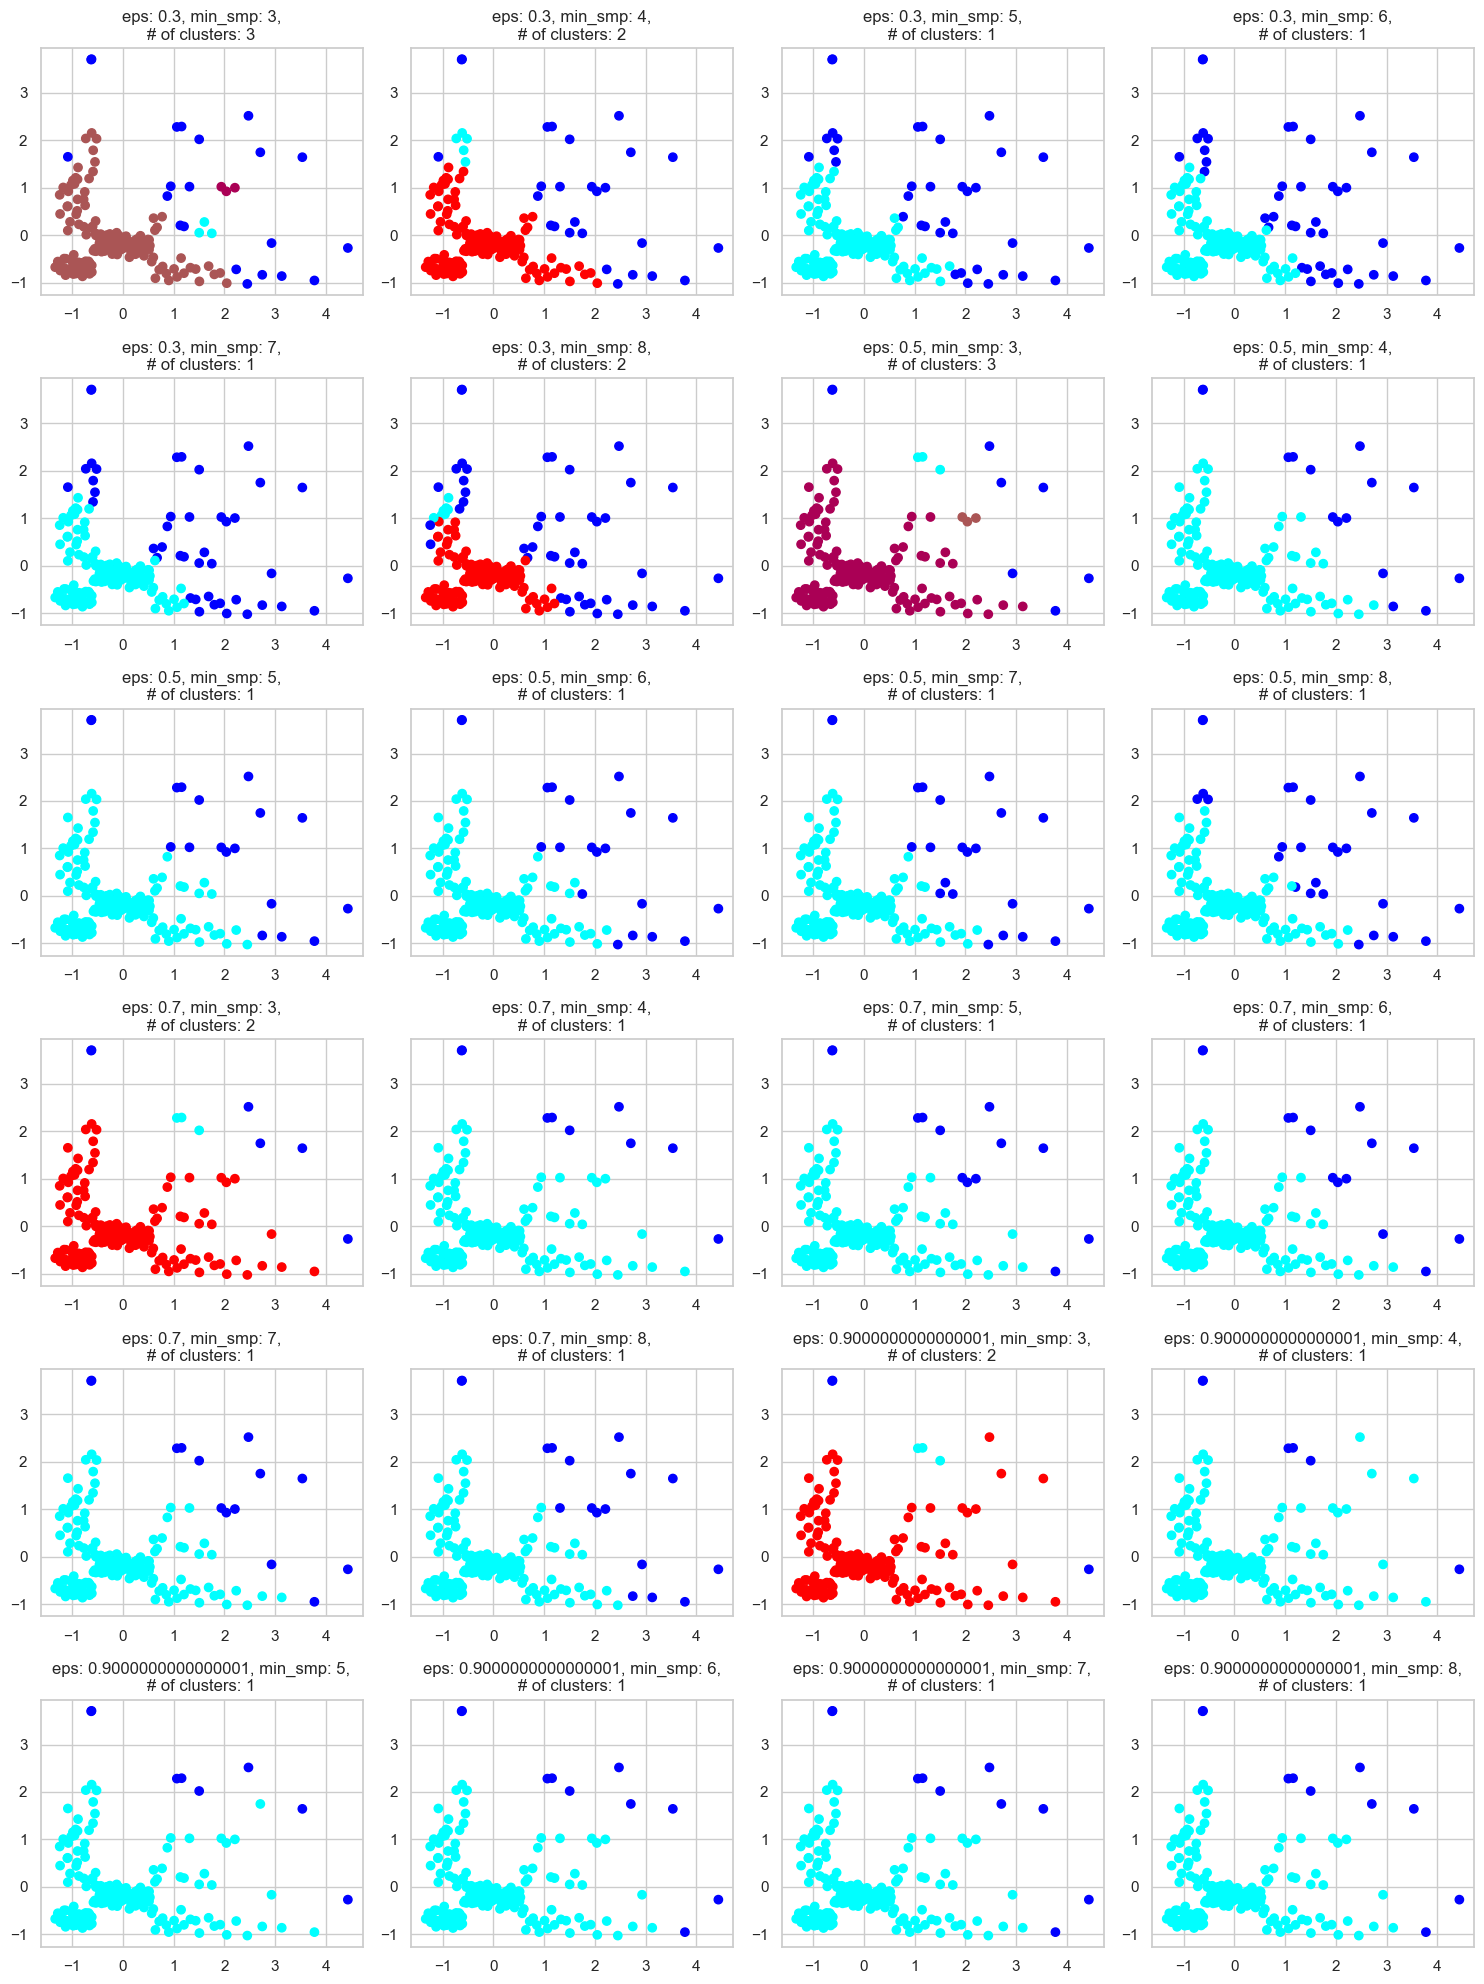

In [45]:
from sklearn.cluster import DBSCAN

plot_id=0
for eps in np.arange(0.3,0.9,0.2):
    for min_samples in range(3,9):
        plot_id+=1
        cl=DBSCAN(eps=eps,min_samples=min_samples)
        result=cl.fit_predict(reduced_data)
        n_clusters=len([c for c in list(set(result)) if c!=-1])
        plt.subplot(6,4,plot_id)
        plt.scatter(reduced_data.Dim1.values.tolist(),
                   reduced_data.Dim2.values.tolist(),
                   cmap=cmap,
                   c=result)
        fig,ax=plt.gcf(),plt.gca()
        fig.set_size_inches(15,20)
        plt.title('eps: ' + str(eps)+', min_smp: ' + str(min_samples)+',\n# of clusters: ' + str(n_clusters))
        plt.tight_layout()
plt.show()